Лабораторная работа №5.2

**Применение ансамблевых моделей на базе решающих деревьев в задачах классификации**

Для выполнения данной работы мы будем использовать набор данных (датасет) с информацией о медицинских параметрах больных диабетом, см. Работу 5.1.

Задачи к лабораторной работе:

1. Решить задачу классификации больных методом случайного леса.

- Провести исследование качества модели от глубины используемых деревьев. Отрисовать зависимость на графике
- Провести исследование качества модели от количества подаваемых на дерево признаков. Отрисовать зависимость на графике
- Провести исследование качества модели от числа деревьев. Отрисовать на графике, дополнить график данными о времени обучения.

2. Решить задачу классификации с использованием XGBoost. Исследовать время обучения, качество полученных результатов. Сравнить с данными полученными в п.1 и сделать выводы (в работе).


#### 1. Решить задачу классификации больных методом случайного леса.


In [111]:
# load diabetes dataset
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [112]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    diabetes.data, diabetes.target, test_size=0.2, random_state=7)

model = RandomForestClassifier(n_estimators=100, max_depth=7)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 0.00%


- Провести исследование качества модели от глубины используемых деревьев. Отрисовать зависимость на графике


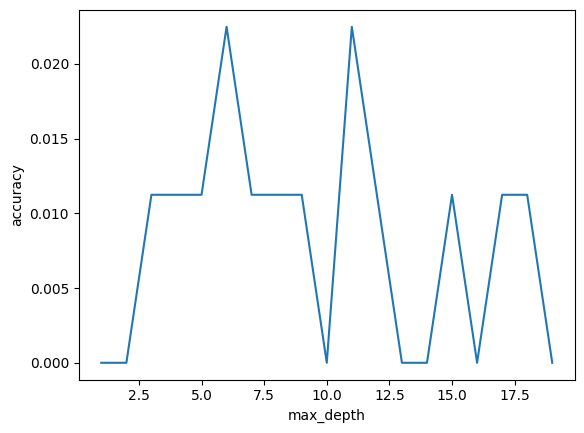

In [113]:
import matplotlib.pyplot as plt


def get_accuracy_depth(max_depth) -> float:
    """find accuracy score for RandomForestClassifier with max_depth parameter

    Args:
        max_depth (int): max_depth parameter for RandomForestClassifier

    Returns:
        float: accuracy score
    """
    model = RandomForestClassifier(n_estimators=100, max_depth=max_depth)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions = [round(value) for value in y_pred]
    return accuracy_score(y_test, predictions)


depths = range(1, 20)
accuracies = [get_accuracy_depth(depth) for depth in depths]

plt.plot(depths, accuracies)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.show()

- Провести исследование качества модели от количества подаваемых на дерево признаков. Отрисовать зависимость на графике


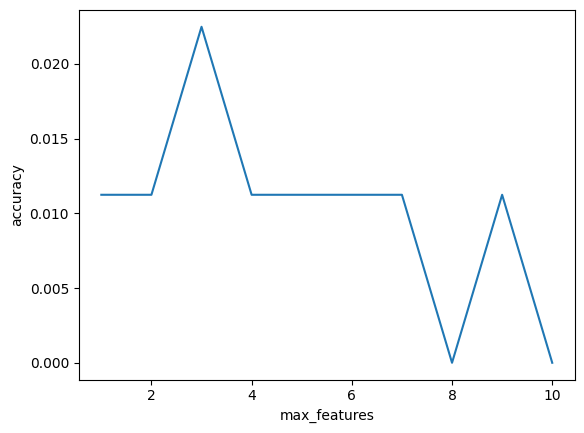

In [114]:
def get_accuracy_features(max_features) -> float:
    """find accuracy score for RandomForestClassifier with max_features parameter

    Args:
        max_features (int): max_features parameter for RandomForestClassifier

    Returns:
        float: accuracy score
    """
    model = RandomForestClassifier(
        n_estimators=100, max_depth=7, max_features=max_features)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions = [round(value) for value in y_pred]
    return accuracy_score(y_test, predictions)


features = range(1, 11)
accuracies = [get_accuracy_features(feature) for feature in features]

plt.plot(features, accuracies)
plt.xlabel('max_features')
plt.ylabel('accuracy')
plt.show()

|   n_estimators |         r2 |      time |
|----------------+------------+-----------|
|              1 | -0.484348  | 0.0045315 |
|              6 | -0.487557  | 0.025611  |
|             11 | -0.521678  | 0.0430851 |
|             16 | -0.264935  | 0.0507814 |
|             21 | -0.620497  | 0.0588075 |
|             26 | -0.0642712 | 0.0692927 |
|             31 | -0.439239  | 0.0803727 |
|             36 | -0.574496  | 0.0947981 |
|             41 | -0.121465  | 0.127712  |
|             46 | -0.490832  | 0.158225  |
|             51 | -0.0461369 | 0.131042  |
|             56 | -0.0780388 | 0.158674  |
|             61 | -0.213258  | 0.184189  |
|             66 | -0.388609  | 0.196679  |
|             71 | -0.523975  | 0.181488  |
|             76 | -0.309591  | 0.216619  |
|             81 | -0.205989  | 0.230944  |
|             86 | -0.498827  | 0.240037  |
|             91 | -0.201357  | 0.267558  |
|             96 | -0.231859  | 0.270206  |


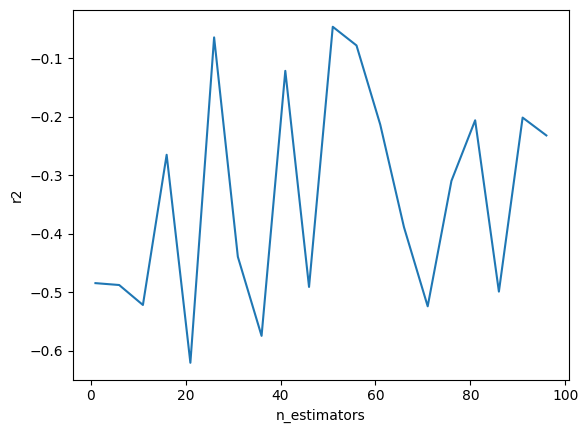

In [115]:
# - Провести исследование качества модели от числа деревьев.
# Отрисовать на графике, дополнить  график данными  о времени обучения.

from timeit import default_timer as timer
from tabulate import tabulate
from sklearn.metrics import r2_score


def get_accuracy_estimators(n_estimators) -> float:
    """find accuracy score for RandomForestClassifier with n_estimators parameter

    Args:
        n_estimators (int): n_estimators parameter for RandomForestClassifier

    Returns:
        float: accuracy score
    """
    model = RandomForestClassifier(
        n_estimators=n_estimators, max_depth=7, max_features=3)
    start = timer()
    model.fit(X_train, y_train)
    end = timer()
    y_pred = model.predict(X_test)
    predictions = [round(value) for value in y_pred]
    return r2_score(y_test, predictions), end - start


estimators = range(1, 100, 5)
accuracies = []
times = []
for estimator in estimators:
    accuracy, time = get_accuracy_estimators(estimator)
    accuracies.append(accuracy)
    times.append(time)

print(tabulate(zip(estimators, accuracies, times),
      headers=['n_estimators', 'r2', 'time'], tablefmt='orgtbl'))

plt.plot(estimators, accuracies)
plt.xlabel('n_estimators')
plt.ylabel('r2')
plt.show()

#### 2. Решить задачу классификации с использованием XGBoost. Исследовать время обучения, качество полученных результатов. Сравнить с данными полученными в п.1 и сделать выводы (в работе).


|   n_estimators |        r2 |      time |
|----------------+-----------+-----------|
|              1 | -1.79787  | 0.0059154 |
|              6 |  0.193999 | 0.0074564 |
|             11 |  0.283242 | 0.0113028 |
|             16 |  0.25762  | 0.0139359 |
|             21 |  0.24921  | 0.0184664 |
|             26 |  0.248659 | 0.0197541 |
|             31 |  0.236203 | 0.0219972 |
|             36 |  0.234125 | 0.0267728 |
|             41 |  0.226423 | 0.0275925 |
|             46 |  0.224439 | 0.034688  |
|             51 |  0.22365  | 0.0358221 |
|             56 |  0.22453  | 0.0379096 |
|             61 |  0.226037 | 0.0408656 |
|             66 |  0.227881 | 0.0447726 |
|             71 |  0.229459 | 0.04449   |
|             76 |  0.229172 | 0.051063  |
|             81 |  0.228569 | 0.051136  |
|             86 |  0.229034 | 0.056381  |
|             91 |  0.228404 | 0.0598175 |
|             96 |  0.228639 | 0.0614346 |


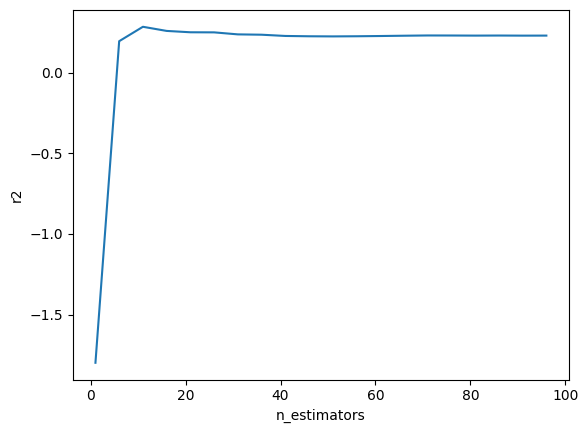

In [116]:
import xgboost as xgb
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import time

# Load the diabetes dataset
X, y = load_diabetes(return_X_y=True)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


def get_accuracy_estimators(n_estimators) -> float:
    """find accuracy score for XGBRegressor with n_estimators parameter

    Args:
        n_estimators (int): n_estimators parameter for XGBRegressor

    Returns:
        float: accuracy score
    """
    model = xgb.XGBRegressor(n_estimators=n_estimators)
    start = timer()
    model.fit(X_train, y_train)
    end = timer()
    y_pred = model.predict(X_test)
    return r2_score(y_test, y_pred), end - start


n_estimators = range(1, 100, 5)
r2_scores = []
times = []

for estimator in n_estimators:
    r2, time = get_accuracy_estimators(estimator)
    r2_scores.append(r2)
    times.append(time)

print(tabulate(zip(n_estimators, r2_scores, times),
               headers=['n_estimators', 'r2', 'time'], tablefmt='orgtbl'))

plt.plot(n_estimators, r2_scores)
plt.xlabel('n_estimators')
plt.ylabel('r2')
plt.show()

#### Вывод: модель xgboost показала лучший результат по сравнению с моделью случайного леса. Время обучения модели xgboost заняло меньше времени, чем время обучения модели случайного леса, а также точность модели xgboost выше, чем точность модели случайного леса.
